## Data Science Project

## Import necessary liberaries 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


%matplotlib inline

## Load Stock Data from Yahoo Finance

In [11]:
data = yf.download("AAPL", start="2018-01-01", end="2024-12-31")
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.426826,40.436216,39.722772,39.933990,102223600
2018-01-03,40.419777,40.964248,40.356415,40.490183,118071600
2018-01-04,40.607533,40.710794,40.384583,40.492536,89738400
2018-01-05,41.069862,41.156695,40.612227,40.703754,94640000
2018-01-08,40.917316,41.213018,40.818746,40.917316,82271200


## Data Cleaning and Feature Engineering

In [14]:
data = data.copy()
data['7_day_MA'] = data['Close'].rolling(window=7).mean()
data['daily_return'] = data['Close'].pct_change()
data = data.dropna()
data.head()

Price,Close,High,Low,Open,Volume,7_day_MA,daily_return
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2018-01-10,40.903236,40.905586,40.600494,40.638045,95839600,40.751025,-0.000229
2018-01-11,41.135574,41.184860,40.950175,40.973641,74670800,40.852275,0.005680
2018-01-12,41.560349,41.623714,41.222402,41.346784,101672400,41.015214,0.010326
2018-01-16,41.349129,42.100120,41.337394,41.750438,118263600,41.121156,-0.005082
2018-01-17,42.032074,42.067275,41.086294,41.339751,137547200,41.258615,0.016517


## Visulaize Trends

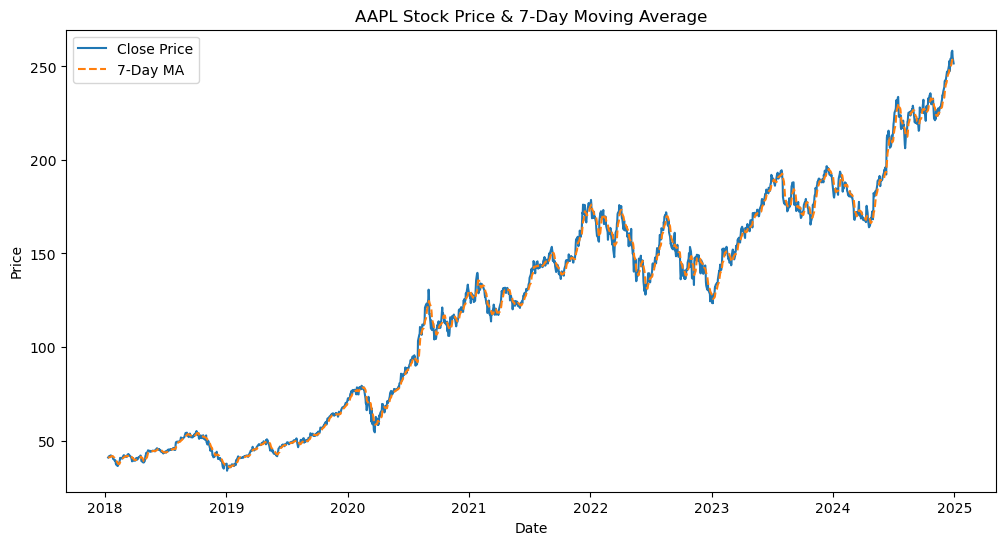

In [17]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['7_day_MA'], label='7-Day MA', linestyle='--')
plt.title('AAPL Stock Price & 7-Day Moving Average')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Model Training(Leaner Regression)

## RSI (Relative Strength Index)

In [29]:
# RSI: measures momentum, values between 0 and 100
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

## MACD (Moving Average Convergence Divergence)

In [33]:
ema_12 = data['Close'].ewm(span=12, adjust=False).mean()
ema_26 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = ema_12 - ema_26
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [35]:
# Drop any NaNs from indicators
data.dropna(inplace=True)

# Define features and target
features = data[['7_day_MA', 'RSI', 'MACD', 'Signal_Line']]
target = data['Close'].shift(-1)

# Align data
features = features.iloc[:-1]
target = target.dropna()

# Split and train
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Model Evaluation

Mean Absolute Error: 3.2097994761525825
Mean Squared Error: 16.5176203243318
R2 Score: 0.9729696313834898


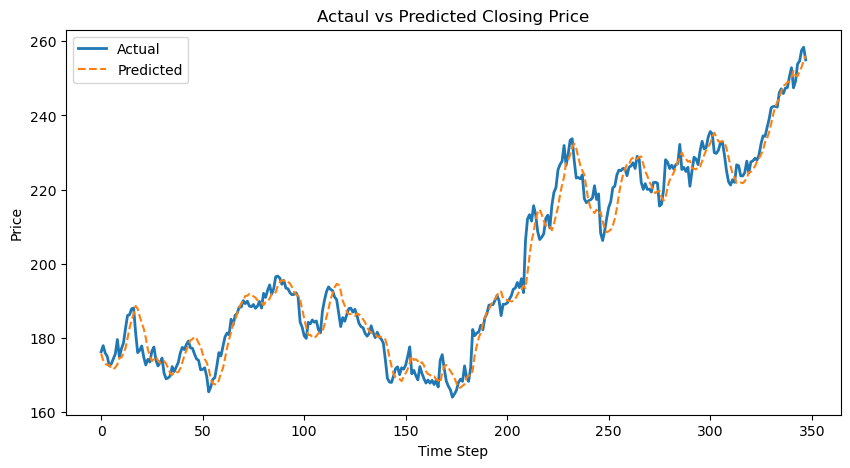

In [37]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual', linewidth=2)
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.title('Actaul vs Predicted Closing Price')
plt.legend()
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.show()